In [1]:
cd /home

/home


In [10]:
from src.pipeline.base import load_pt_data
import tomli
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
config_file = './presentation/experiments/astromer_nsp/config_files/macho/alcock.500.f0.a.toml'
with open(config_file, mode="rb") as fp:
    config = tomli.load(fp)
config['pretraining']

{'exp_path': './presentation/experiments/astromer_nsp/results/macho/pretraining',
 'lr': 0.001,
 'scheduler': True,
 'epochs': 10000,
 'patience': 40,
 'data': {'path': './data/records/macho',
  'batch_size': 2500,
  'repeat': 4,
  'sampling': True,
  'normalize': True,
  'shuffle_train': True,
  'shuffle_val': False,
  'shuffle_test': False,
  'cache_train': True,
  'cache_val': True,
  'cache_test': False}}

In [4]:
data = load_pt_data(config, subsets=['train', 'val', 'test'], step='pretraining',
                    nsp_prob=.5, nsp_frac=.5)

[INFO] Loading data from ./data/records/macho


2022-11-10 20:02:51.415022: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 20:02:53.905175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 671 MB memory:  -> device: 0, name: Graphics Device, pci bus id: 0000:81:00.0, compute capability: 8.6
2022-11-10 20:02:53.906667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22349 MB memory:  -> device: 1, name: Graphics Device, pci bus id: 0000:82:00.0, compute capability: 8.6
2022-11-10 20:02:53.907473: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 

[INFO] Repeating dataset x4 times
[INFO] Using NSP
[INFO] Mov. win:  False
[INFO] Using NSP
[INFO] Mov. win:  False
[INFO] Using NSP
[INFO] Mov. win:  False


2022-11-10 20:26:16.417456: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


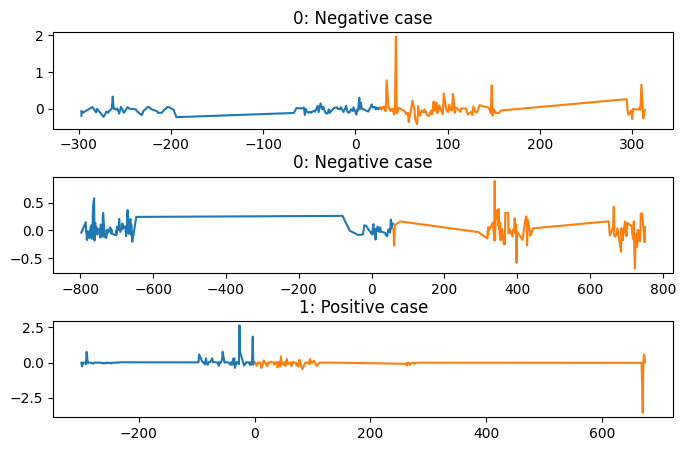

In [33]:
N=3
fig, axes = plt.subplots(N, 1, figsize=(8,5), gridspec_kw={'hspace': 0.5, 'wspace': 0.2})

for i, (x, y) in enumerate(data['train'].unbatch().take(N)):
    sample = x['input']
    times = x['times']
    label = y['nsp_label']
    
    where = np.where(sample==-98)
    x_0  = sample[1:where[0][0]]
    x_1  = sample[where[0][0]+1:where[0][1]]
    
    t_0  = times[1:where[0][0]]
    t_1  = times[where[0][0]+1:where[0][1]]
    
    axes[i].plot(t_0, x_0, label='First Part')
    axes[i].plot(t_1, x_1, label='Second Part')
    
    if label == 0:
        axes[i].set_title(f'{label}: Negative case')
    else:
        axes[i].set_title(f'{label}: Positive case')

# 